In [2]:
import matplotlib.pyplot as plt
from helpers.cm26 import DatasetCM26, remesh
from helpers.computational_tools import select_NA, select_Pacific, StateFunctions, compare
from helpers.ann_tools import ANN, import_ANN
import numpy as np
%load_ext autoreload
%autoreload 3

In [3]:
ds = DatasetCM26()

In [ ]:
training_dataset = ds.sample_epoch(time=np.random.randint(8035))

# Comparing prediction by ANN trained on ZB20 data to ZB20 itself

Correlation: 0.9945968980702647
Relative Error: 0.09643778726731236
R2 =  0.9892125685743738
R2 max =  0.9892230271167384
Optinal scaling: 0.996759002930762
Nans: 0


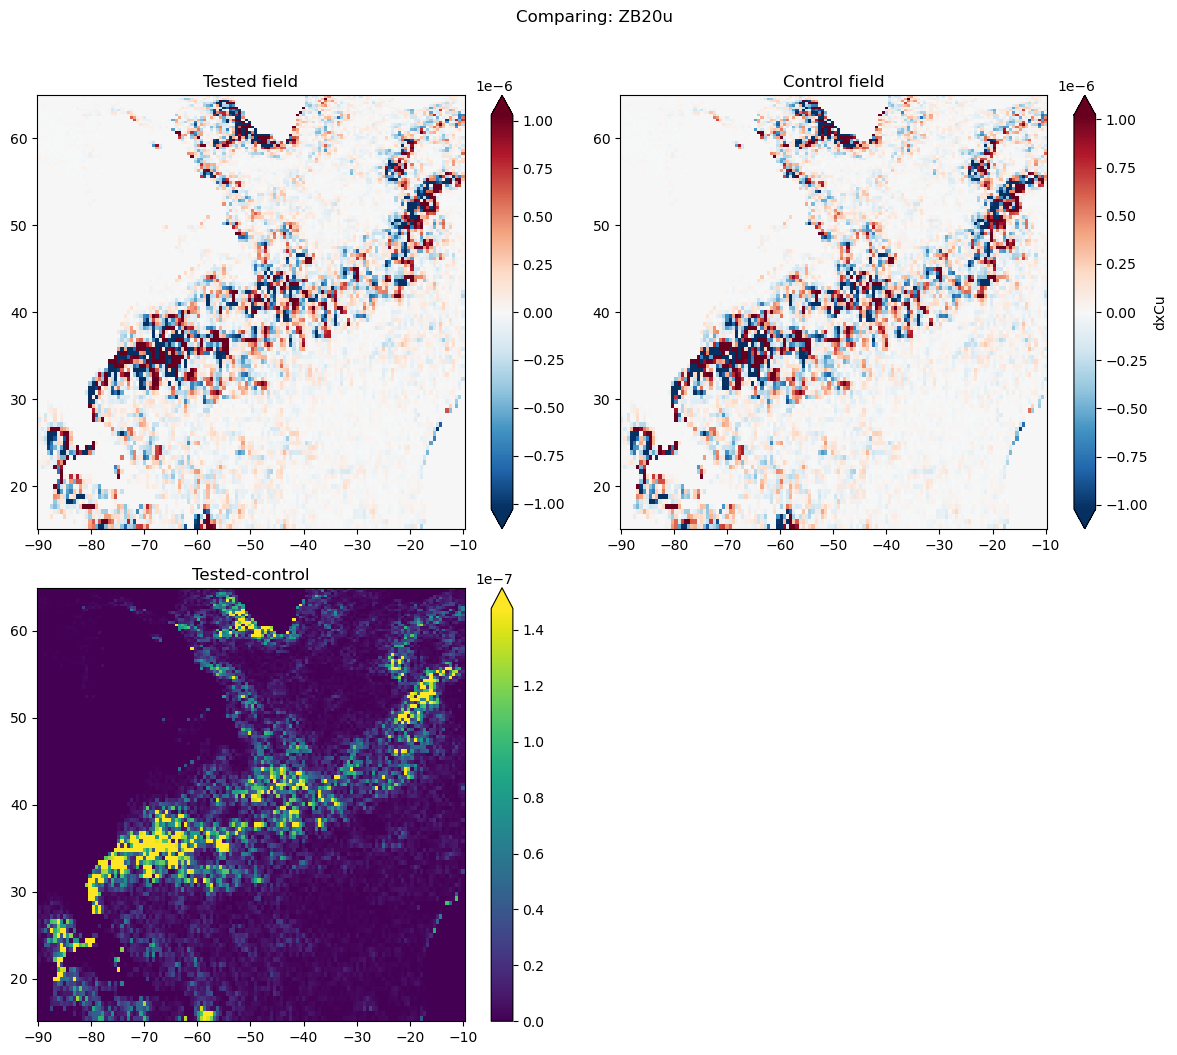

In [31]:
for key in ['ZB20u']:
    for factor in [6]:
        dataset = training_dataset[factor]
        ZB = dataset.state.ZB20()
        ann = dataset.state.ANN(time_revers=False)
        compare(ZB[key], ann[key])#,selector=lambda x: x)
        plt.suptitle(f'Comparing: {key}', y=1.05)

Correlation: 0.9930728583384103
Relative Error: 0.12282719274055741
R2 =  0.9861258551799903
R2 max =  0.9861942483558064
Optinal scaling: 0.9917410762986263
Nans: 0


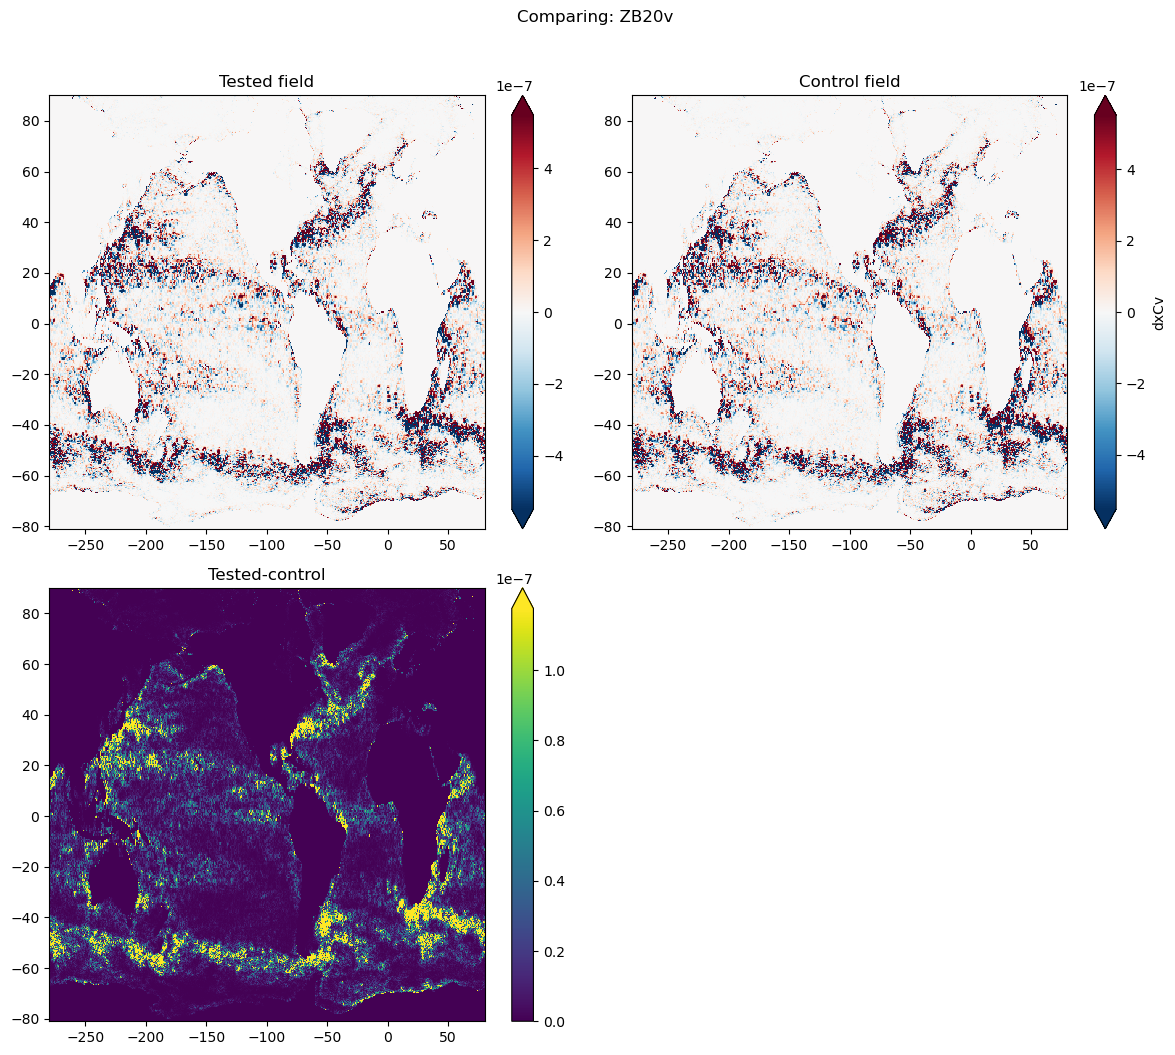

In [34]:
for key in ['ZB20v']:
    for factor in [6]:
        dataset = training_dataset[factor]
        ZB = dataset.state.ZB20()
        ann = dataset.state.ANN(time_revers=False)
        compare(ZB[key], ann[key],selector=lambda x: x)
        plt.suptitle(f'Comparing: {key}', y=1.05)

Correlation: 0.9992943403082606
Relative Error: 0.03489863113657575
R2 =  0.9986687726106936
R2 max =  0.9986698845887733
Optinal scaling: 0.9989459065667173
Nans: 0
Correlation: 0.9990167807674275
Relative Error: 0.048441814275025856
R2 =  0.998115821050964
R2 max =  0.9981174074561756
Optinal scaling: 1.0012623044556246
Nans: 0
Correlation: 0.9995784765319318
Relative Error: 0.03296824146317595
R2 =  0.9991568470771501
R2 max =  0.9991571031798252
Optinal scaling: 1.00050653574435
Nans: 0


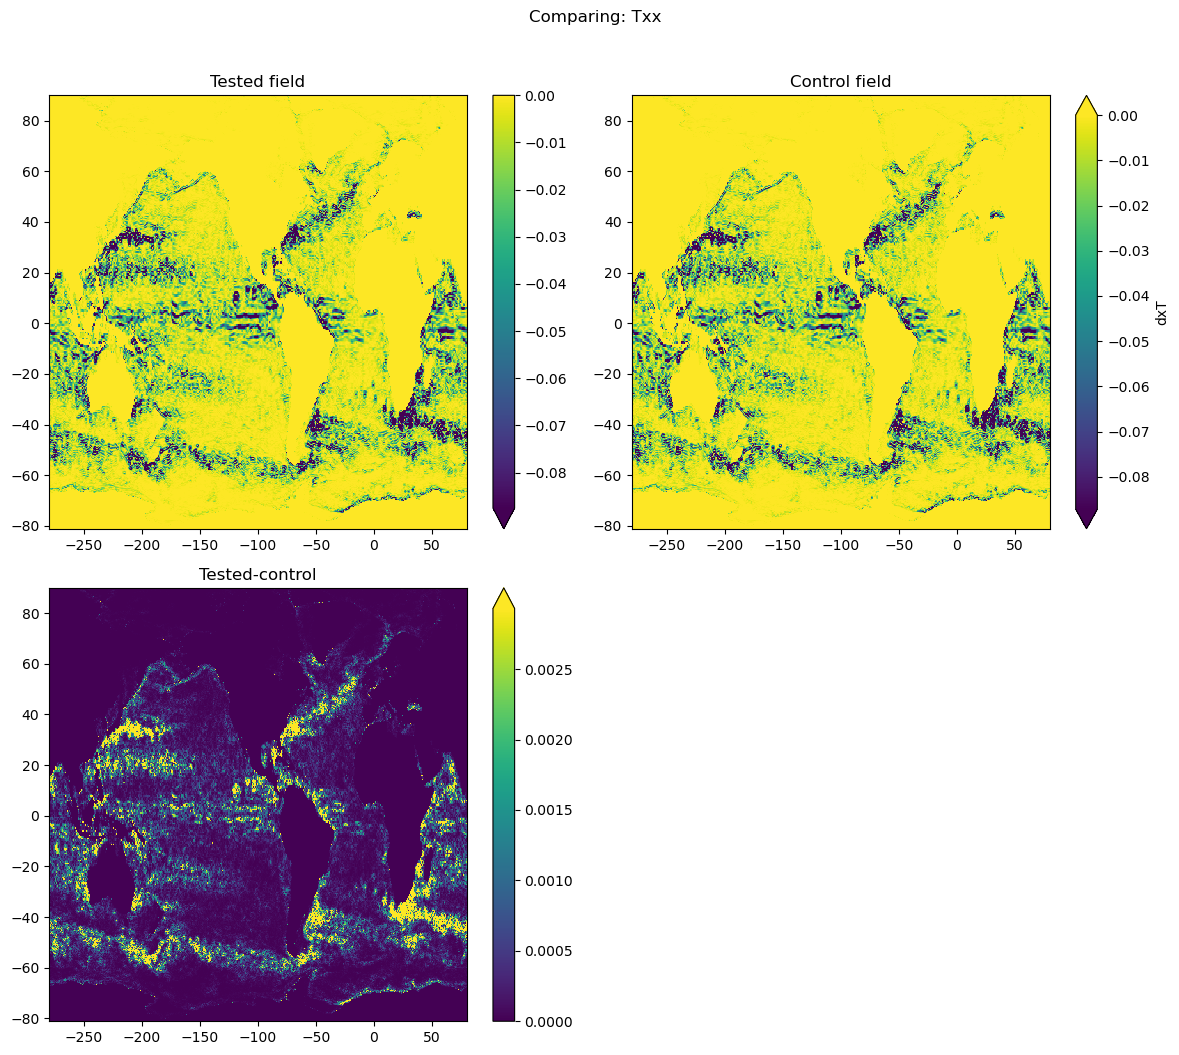

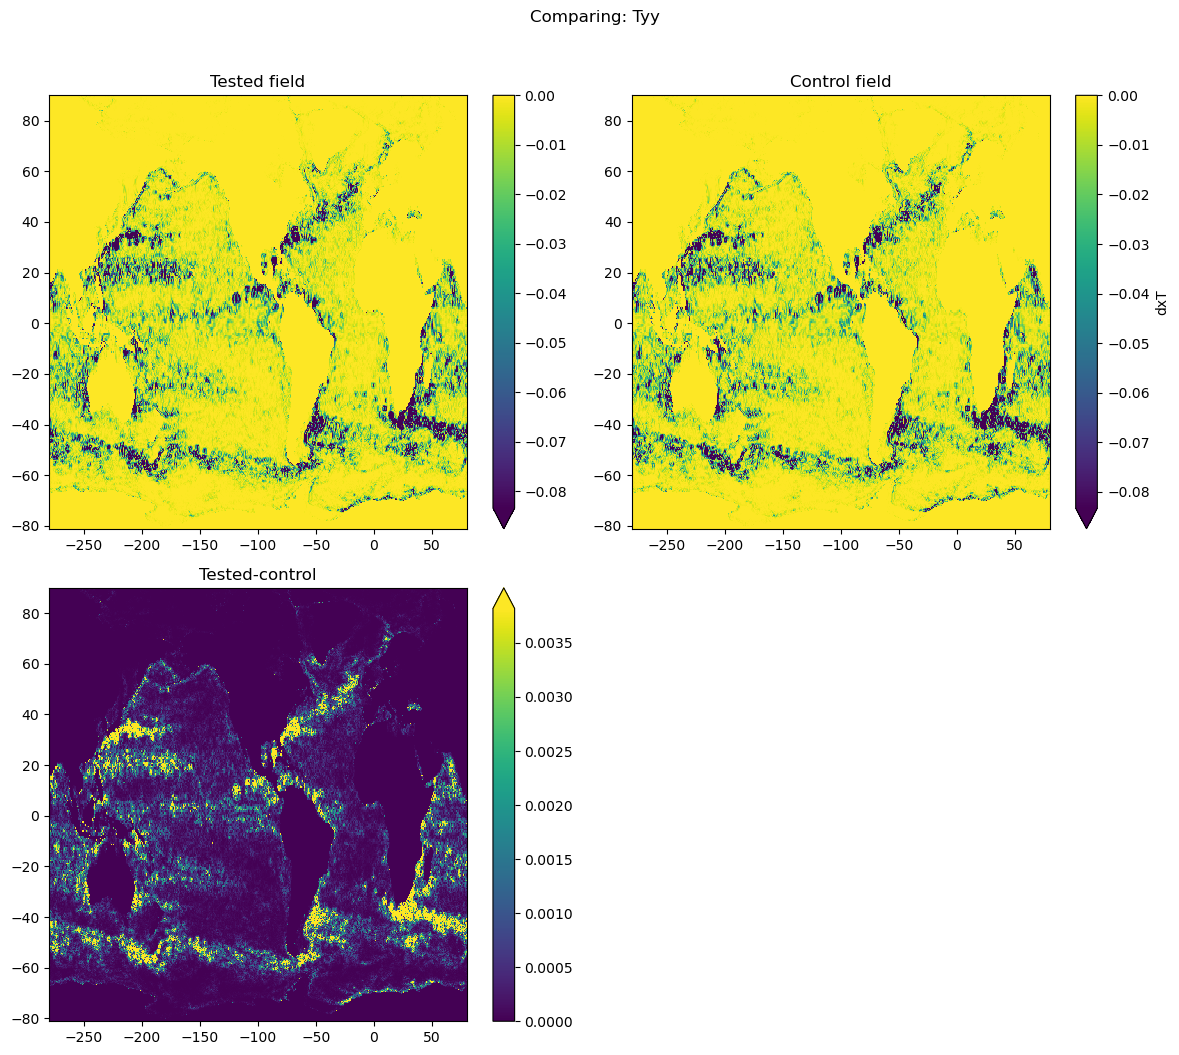

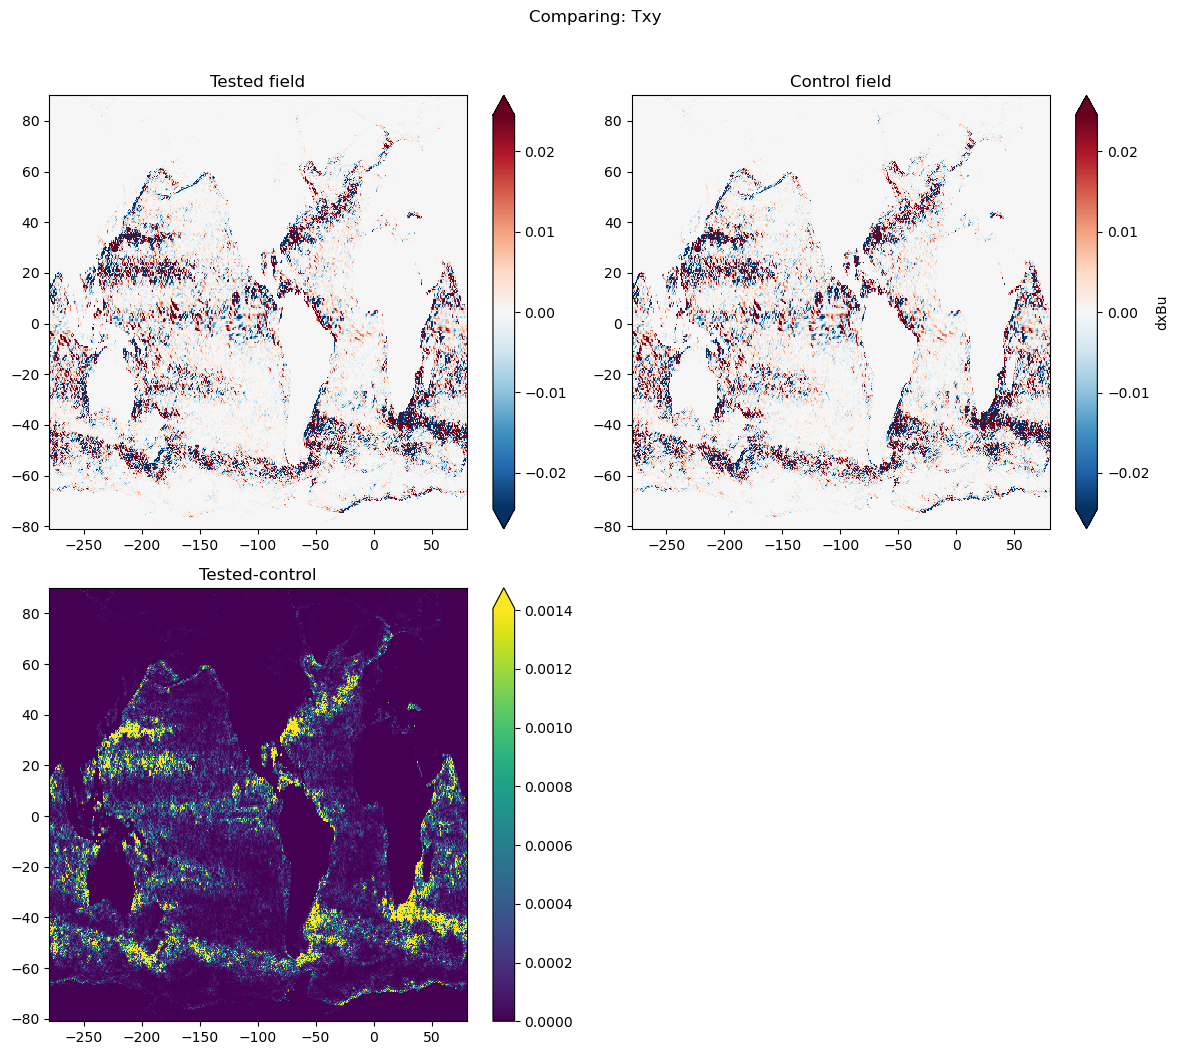

In [13]:
for key in ['Txx', 'Tyy', 'Txy']:
    for factor in [6]:
        dataset = training_dataset[factor]
        ZB = dataset.state.ZB20()
        ann = dataset.state.ANN()
        compare(ZB[key], ann[key],selector=lambda x: x)
        plt.suptitle(f'Comparing: {key}', y=1.05)

# The ANN trained on CM2.6 data is almost time-reversible

In [42]:
ann_Txy = import_ANN('trained_models/ANN_CM26/Txy_epoch_2000.nc')
ann_Txx_Tyy = import_ANN('trained_models/ANN_CM26/Txx_Tyy_epoch_2000.nc')

In [45]:
%time training_dataset = ds.sample_epoch(time=np.random.randint(8035))

CPU times: user 6.11 s, sys: 1.65 s, total: 7.76 s
Wall time: 7.16 s


Correlation: 0.9330963955281255
Relative Error: 0.3786985908129437
R2 =  0.8685100797694216
R2 max =  0.8706697049186077
Optinal scaling: 0.9525589457595831
Nans: 0


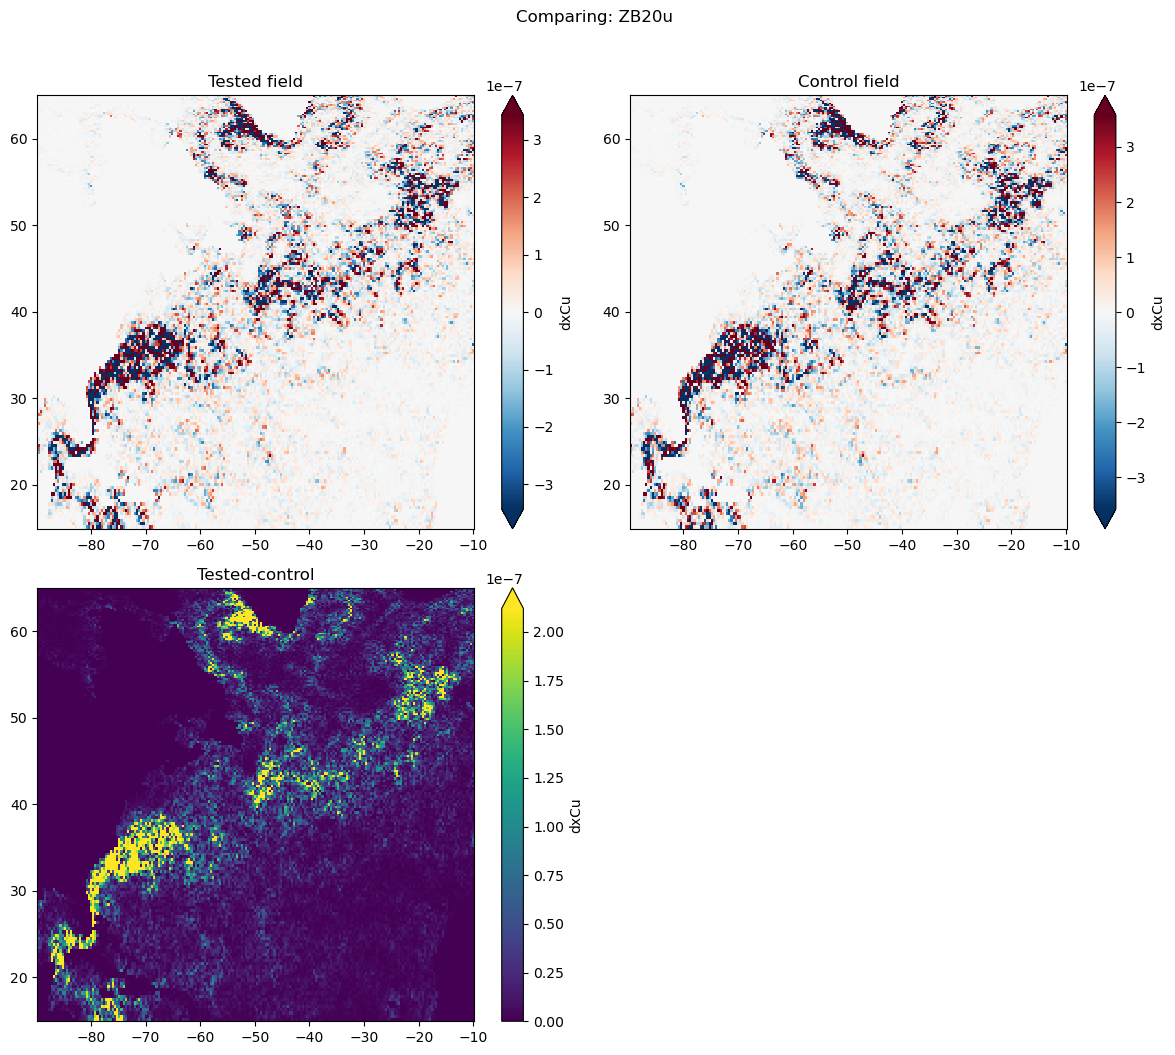

In [56]:
for factor in [4]:
    dataset = training_dataset[factor]
    ann = dataset.state.ANN(ann_Txy, ann_Txx_Tyy, time_revers=False)['ZB20u']
    ann_rev = dataset.state.ANN(ann_Txy, ann_Txx_Tyy, time_revers=True)['ZB20u']
    compare(ann_rev, ann)#,selector=lambda x: x)
    plt.suptitle(f'Comparing: {key}', y=1.05)